# Parte 2 - Sección 6: Regresión polinomica

In [85]:
import pandas as pd

df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**Descripción del dataset:** Sueldos de puestos en una empresa según su posisión y nivel de importancia

In [86]:
X = df.iloc[:, 1:-1].values # Level  -> tiene que ser una matriz
y = df.iloc[:, -1].values # Salary -> tiene que ser un vector

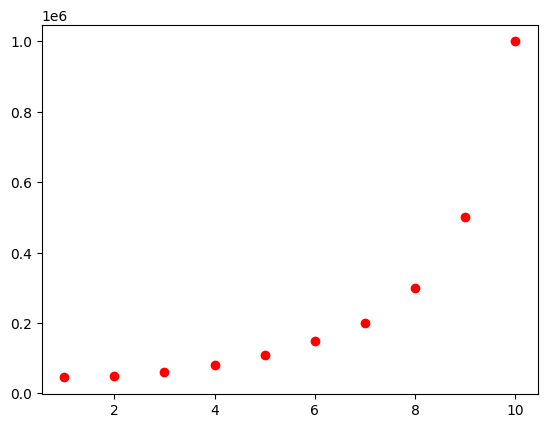

In [87]:
import matplotlib.pyplot as plt

# Observar tendencia como de una curva en los datos
plt.scatter(X, y, color= 'red')
plt.show()

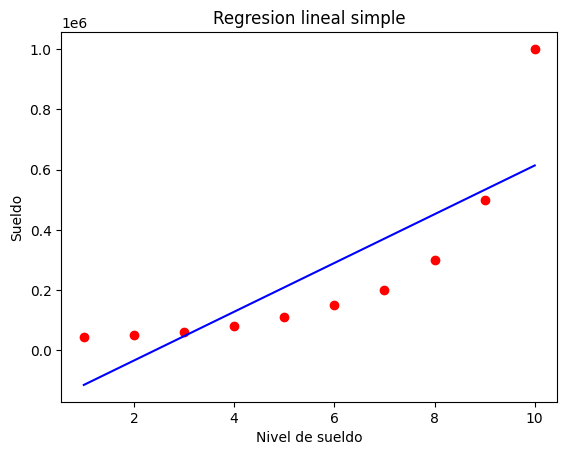

In [88]:
# Veamos que pasas si usamos una regresión lineal
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

import matplotlib.pyplot as plt

plt.scatter(X, y, color= 'red')
plt.plot(X, y_pred, color= 'blue')
plt.xlabel('Nivel de sueldo')
plt.ylabel('Sueldo')
plt.title('Regresion lineal simple')
plt.show()

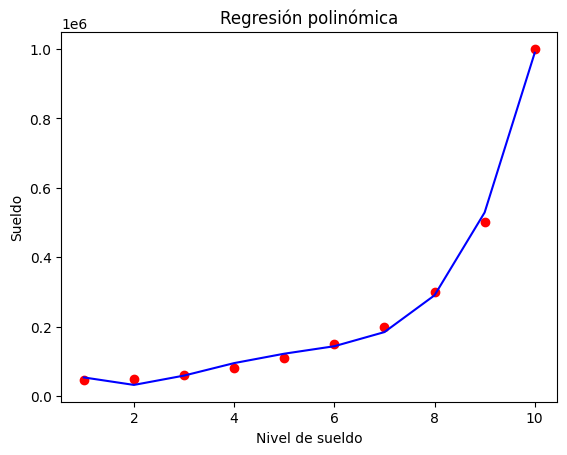

In [89]:
# Ahora, veamos como se ajusta la regresión polinomica
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 4) # Entre más grado, más overfited
X_poly = poly_reg.fit_transform(X) # Transformar los datos dependiendo del grado escogido

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_poly_pred = lin_reg_2.predict(X_poly)

plt.scatter(X, y, color= 'red')
plt.plot(X, y_poly_pred, color= 'blue')
plt.xlabel('Nivel de sueldo')
plt.ylabel('Sueldo')
plt.title('Regresión polinómica')
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_22128\1757195131.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


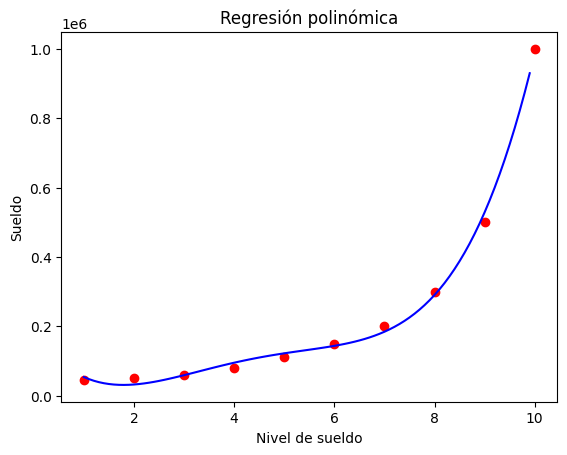

In [90]:
# Hacer más suave la curva de la grafica
import numpy as np

X_grid = np.arange(min(X), max(X), 0.1)  
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color= 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color= 'blue')
plt.xlabel('Nivel de sueldo')
plt.ylabel('Sueldo')
plt.title('Regresión polinómica')
plt.show()

In [93]:
# Predicción de un valor en especifico 
salario_lineal = lin_reg.predict([[6.5]]) # escalar: [[numero]]
print('Salario bajo el modelo lineal: ', salario_lineal[0])

salario_polinomico = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('Salario bajo el modelo polinómico: ', salario_polinomico[0])

Salario bajo el modelo lineal:  330378.78787878784
Salario bajo el modelo polinómico:  158862.45265155006
